## LDA

In [1]:
file_path = 'C:\\Users\\cho03\\OneDrive\\바탕 화면\\대학\\3학년\\1학기\\세미나\\방학 세미나\\' # data가 저장된 파일 경로

In [2]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')   # 선명하게 시각화
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook # progress bar
from tqdm import tqdm # 진행률 피드백 라이브러리
from matplotlib import rc, font_manager
import seaborn as sns

C:\Users\cho03\AppData\Local\Temp\ipykernel_21980\479636918.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 선명하게 시각화


In [3]:
import pickle
f = open(file_path + 'total_doc.pkl', "rb") #전처리된 data 불러오기
data = pickle.load(f)
f.close()

토픽모델링 : 각 단어나 문서들의 집합에 대해 숨겨진 주제를 찾아내어 문서나 키워드별로 주제끼리 묶어주는 비지도학습 알고리즘

LDA기법: 확률을 바탕으로 단어가 특정 주제에 존재할 확률과 문서에 특정 주제가 존재할 확률을 결합확률로 추정하여 토픽추출


!pip install gensim

#### 본문 LDA

In [4]:
# 명사만 추출한 리스트를 바탕으로 단어 빈도별 목록을 생성.
from gensim import corpora, models
noun_dic=corpora.Dictionary(data['doc_token_noun'])  # 딕셔너리 클래스로 사전생성, 각 단어별 id도 함께 생성
noun_dic.token2id                                # 각 단어 별 생성된 id 확인     

{'136': 0,
 '4년': 1,
 '80': 2,
 '가구': 3,
 '가정': 4,
 '각성': 5,
 '간호': 6,
 '개인': 7,
 '개인화': 8,
 '거동': 9,
 '건강': 10,
 '격차': 11,
 '경험': 12,
 '고령화사회': 13,
 '고조': 14,
 '공감': 15,
 '공약': 16,
 '관심': 17,
 '관점': 18,
 '괴리': 19,
 '교육원': 20,
 '구조': 21,
 '국한': 22,
 '군가': 23,
 '그릇': 24,
 '그지': 25,
 '근본': 26,
 '긍정': 27,
 '기관': 28,
 '기미': 29,
 '기억': 30,
 '기회': 31,
 '나마': 32,
 '나머지': 33,
 '나이': 34,
 '남녀노소': 35,
 '남자': 36,
 '남자들': 37,
 '노년': 38,
 '노부모': 39,
 '논문': 40,
 '다그': 41,
 '다나': 42,
 '다우': 43,
 '대다수': 44,
 '대답': 45,
 '대부분': 46,
 '대상': 47,
 '대세': 48,
 '대안': 49,
 '대학원': 50,
 '동서고금': 51,
 '똥개': 52,
 '라고': 53,
 '만도': 54,
 '말씀': 55,
 '며느리': 56,
 '명당': 57,
 '모로': 58,
 '모친': 59,
 '목도': 60,
 '무관심': 61,
 '문제': 62,
 '물건': 63,
 '미래': 64,
 '민낯': 65,
 '반문': 66,
 '반성': 67,
 '배변': 68,
 '배우자': 69,
 '배출': 70,
 '변한': 71,
 '병원': 72,
 '보니': 73,
 '부담': 74,
 '부모': 75,
 '부분': 76,
 '부양자': 77,
 '부인': 78,
 '부족': 79,
 '분담': 80,
 '분도': 81,
 '분야': 82,
 '불투명': 83,
 '불편': 84,
 '붕괴': 85,
 '빈부': 86,
 '사례': 87,
 '사실': 88,
 '산업': 89,

In [5]:
corpus = [noun_dic.doc2bow(text) for text in data['doc_token_noun']]
# 문서별 문서 안의 단어의 id와 빈도수로 수치화

In [6]:
import gensim
from gensim.models import CoherenceModel

Lda = gensim.models.ldamodel.LdaModel 
perplexity_score = []  # perplexity_score를 저장할 리스트
coherence_score = []   # coherence_score를 저장할 리스트

for i in range(1,6): # 토픽 개수가 1,2,3,4,5개인 5가지 경우의 혼잡도와 일관성 측정
    ldamodel = Lda(corpus, num_topics = i, id2word = noun_dic, passes = 15, random_state = 0) # passes : 모델 학습 시 알고리즘의 동작 횟수
    perplexity_score.append(ldamodel.log_perplexity(corpus)) # 혼잡도 : 실제로 관측되는 값을 얼마나 잘 예측하는지
    coherence_score.append(CoherenceModel(model = ldamodel, texts = data['doc_token_noun'],
                                         dictionary = noun_dic, coherence = 'c_v').get_coherence()) # 일관성 : 한 주제 안에 유사한 단어가 많이 모여있는가
    print(i,'process complete')

1 process complete
2 process complete
3 process complete
4 process complete
5 process complete


### 토픽 개수 결정

#### 토픽 수에 따른 혼잡성 점수 그래프 확인

혼잡성
- 확률 모델이 결과를 얼마나 정확하게
예측하는지 판단
- 낮을수록 정확하게 예측
- 하지만 낮다고 해서, 
결과가 해석에 용이하다는 의미는 아님

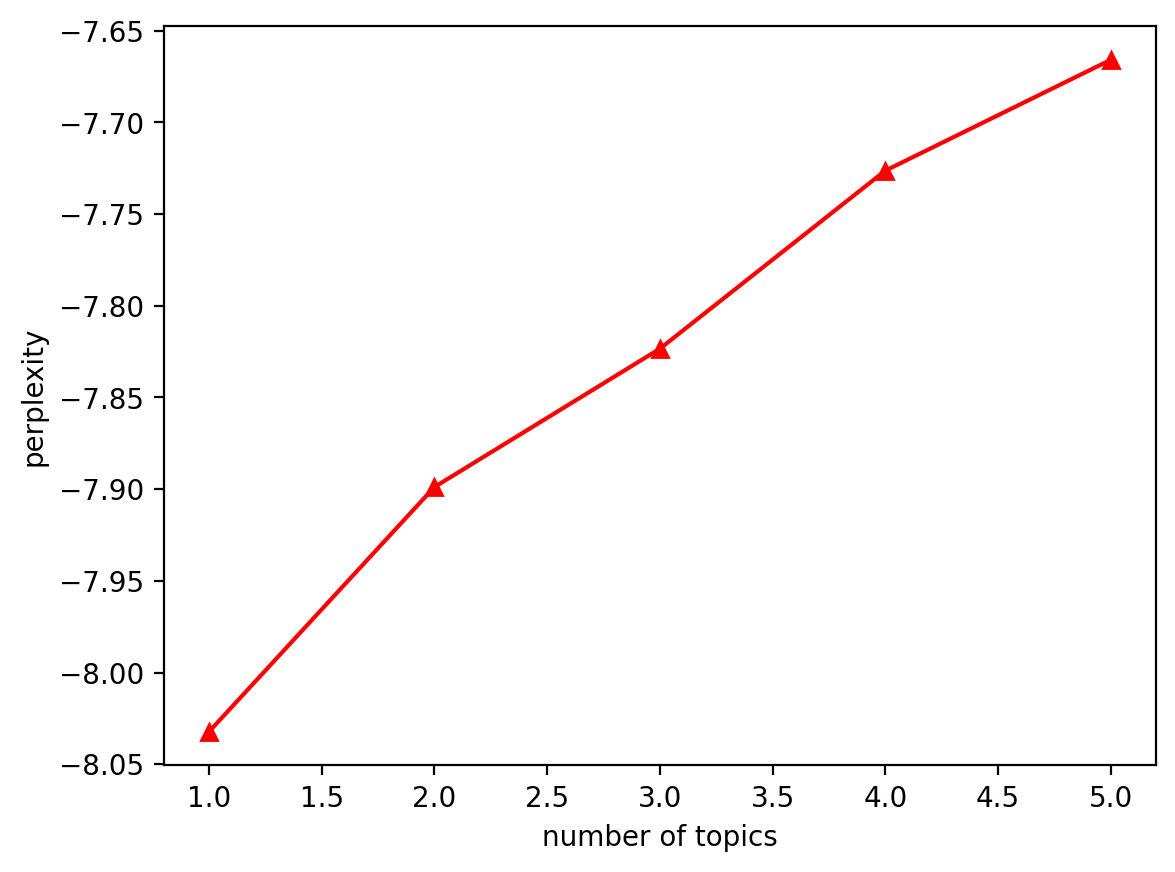

In [7]:
plt.plot(range(1,6), perplexity_score, 'r', marker ='^') #(x,y,color)
plt.xlabel("number of topics")
plt.ylabel("perplexity") # 혼잡도
plt.show()

#### 토픽 수에 따른 일관성 점수 그래프 확인

일관성
- 토픽이 얼마나 의미론적으로 일관성
있는지 판단
- 높을수록 의미론적 일관성 높음

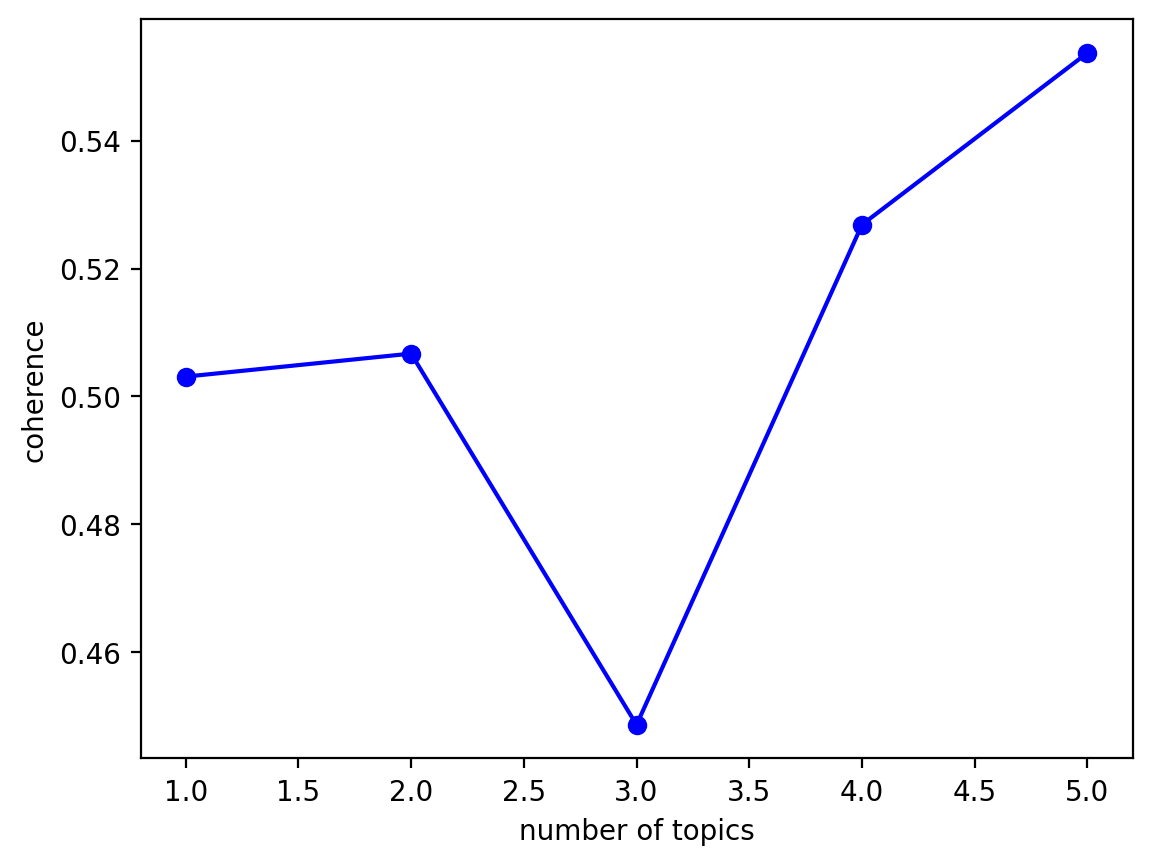

In [8]:
plt.plot(range(1,6), coherence_score, 'b', marker ='o') # 파란색, o 모양
plt.xlabel("number of topics")
plt.ylabel("coherence") # 일관성
plt.show()

### LDA 토픽 모델링 진행

In [9]:
# 최적의 토픽수(4)로 토픽 모델링 진행
noun_lda = Lda(corpus, num_topics = 4, id2word = noun_dic, passes = 15, random_state = 0)
topics = noun_lda.print_topics(num_words = 5) # 토픽별 5개의 단어씩 출력
for topic in topics: # 4개의 토픽이므로 4로 압축된 토픽을 각각 출력
    print(topic)

(0, '0.022*"복지" + 0.022*"시설" + 0.019*"요양" + 0.015*"급여" + 0.013*"기관"')
(1, '0.016*"학대" + 0.014*"보호" + 0.013*"문제" + 0.012*"복지" + 0.011*"치매"')
(2, '0.017*"인구" + 0.015*"소득" + 0.012*"연금" + 0.010*"가구" + 0.009*"지원"')
(3, '0.062*"감사" + 0.014*"알레르기" + 0.012*"건강" + 0.012*"마음" + 0.011*"표현"')


In [10]:
# Lda 시각화
import pyLDAvis
import pyLDAvis.gensim_models # prepare 함수를 쓰기 위한 라이브러리
pyLDAvis.enable_notebook()
lda_viz = pyLDAvis.gensim_models.prepare(noun_lda, corpus, noun_dic)

pyLDAvis.display(lda_viz)

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


### 데이터프레임 내 토픽번호 삽입

In [12]:
noun_dtm = [noun_dic.doc2bow(text) for text in data['doc_token_noun']] # 문서별 문서 안의 단어의 id와 빈도수로 수치화
ldamodel=Lda(noun_dtm, num_topics=4, id2word=noun_dic, passes=10,random_state=0)

topics = [] # 예측된 토픽들을 저장할 리스트
for i in range(len(noun_dtm)):  # 각 문서에 대해 반복
    prop_sort=[]  # 토픽별 확률을 저장할 리스트
    topic_sort=[] # 토픽 인덱스를 저장할 리스트
    for topic , prop in ldamodel.get_document_topics(noun_dtm)[i]:  #각 문서마다 토픽 별로 해당할 확률이 부여됨
        prop_sort.append(prop)  # 해당 토픽의 확률을 리스트에 추가
        topic_sort.append(topic)  # 해당 토픽의 인덱스를 리스트에 추가
    topics.append(topic_sort[prop_sort.index(max(prop_sort))])  #확률 중 가장 높은 확률의 토픽을 해당 문서의 토픽으로 지정

data['doc_topic'] = topics #모든 문서의 토픽을 데이터프레임에 추가

In [13]:
for doc_topic, prop in ldamodel.get_document_topics(noun_dtm)[1]:
    print(doc_topic, prop) # 토픽, 확률을 출력

0 0.012436345
1 0.023987703
2 0.81218165
3 0.1513943


In [14]:
f = open(file_path + "topic_doc.pkl", "wb")
pickle.dump(data, f)  # 파일로 저장
f.close()

In [15]:
f = open(file_path + "topic_doc.pkl", "rb")
aa = pickle.load(f) # 불러오기
f.close()

In [16]:
topic0 = aa[aa['doc_topic'] == 0]  # 'doc_topic' 컬럼 값이 0인 행들만 선택하여 topic0에 저장
topic1 = aa[aa['doc_topic'] == 1]  # 'doc_topic' 컬럼 값이 1인 행들만 선택하여 topic1에 저장
topic2 = aa[aa['doc_topic'] == 2]  # 'doc_topic' 컬럼 값이 2인 행들만 선택하여 topic2에 저장
topic3 = aa[aa['doc_topic'] == 3]  # 'doc_topic' 컬럼 값이 3인 행들만 선택하여 topic3에 저장

### 토픽별 워드 클라우드

In [17]:
topic0_tn = topic0['doc_token_noun']  # 토픽 번호가 0인 문서들의 토큰화된 명사들을 topic0_tn에 저장
topic1_tn = topic1['doc_token_noun']  # 토픽 번호가 1인 문서들의 토큰화된 명사들을 topic1_tn에 저장
topic2_tn = topic2['doc_token_noun']  # 토픽 번호가 2인 문서들의 토큰화된 명사들을 topic2_tn에 저장
topic3_tn = topic3['doc_token_noun']  # 토픽 번호가 3인 문서들의 토큰화된 명사들을 topic3_tn에 저장

In [18]:
import itertools
topic0_nlist = list(itertools.chain(*topic0_tn)) # 리스트 언패킹
topic1_nlist = list(itertools.chain(*topic1_tn)) # 리스트 언패킹
topic2_nlist = list(itertools.chain(*topic2_tn)) # 리스트 언패킹
topic3_nlist = list(itertools.chain(*topic3_tn)) # 리스트 언패킹

In [19]:
from collections import Counter # 단어들을 쉽게 집계하기 위해 사용

### 토픽 0

In [20]:
count = Counter(topic0_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund0 = dict(count.most_common(50)) # 상위 50개 단어 출력
hund0

{'요양': 2900,
 '급여': 2331,
 '복지': 1744,
 '시설': 1730,
 '지원': 1424,
 '수급': 1377,
 '소득': 1217,
 '가구': 1158,
 '생활': 1119,
 '방문': 981,
 '제공': 933,
 '보호': 904,
 '보장': 882,
 '생계': 871,
 '재산': 775,
 '필요': 744,
 '제도': 694,
 '폐지': 682,
 '신청': 660,
 '의료': 653,
 '기관': 638,
 '이용': 626,
 '센터': 523,
 '가정': 519,
 '의무자': 496,
 '주거': 469,
 '권리': 428,
 '대상': 418,
 '교육': 397,
 '능력': 365,
 '신체': 358,
 '학대': 356,
 '입소': 353,
 '해당': 345,
 '도움': 338,
 '관련': 331,
 '치매': 328,
 '보건': 328,
 '인정': 320,
 '부담': 318,
 '운영': 316,
 '조사': 316,
 '내용': 312,
 '비용': 309,
 '판정': 305,
 '건강': 301,
 '상담': 300,
 '전문': 299,
 '의무': 298,
 '목욕': 292}

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<function matplotlib.pyplot.show(close=None, block=None)>

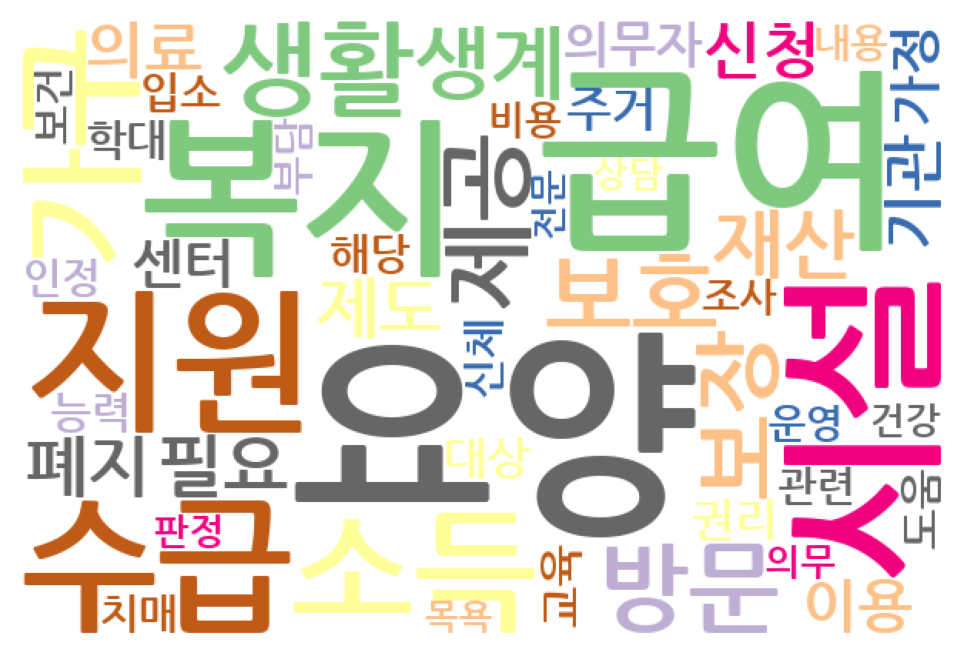

In [22]:
%matplotlib inline
wordcloud = WordCloud(font_path = file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund0)
# 워드클라우드 출력

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 1

In [23]:
count = Counter(topic1_nlist) # Counter 객체를 사용하여 topic1_nlist 리스트의 요소들을 카운트
hund1 = dict(count.most_common(50)) # 상위 50개 단어 출력
hund1

{'복지': 2720,
 '문제': 2333,
 '치매': 2244,
 '보호': 1447,
 '학대': 1416,
 '인구': 1278,
 '필요': 1205,
 '정책': 1046,
 '부담': 999,
 '요양': 989,
 '제공': 957,
 '지원': 948,
 '변화': 946,
 '교육': 937,
 '생활': 924,
 '시설': 891,
 '상담': 811,
 '센터': 760,
 '자녀': 747,
 '관계': 742,
 '신체': 733,
 '건강': 731,
 '기관': 621,
 '제도': 613,
 '프로그램': 613,
 '발생': 578,
 '전문': 561,
 '관련': 545,
 '보장': 541,
 '부모': 535,
 '역할': 533,
 '내용': 514,
 '개인': 502,
 '소득': 500,
 '정서': 499,
 '해결': 495,
 '가정': 486,
 '세대': 474,
 '욕구': 473,
 '노후': 468,
 '장애': 453,
 '상황': 451,
 '대상': 439,
 '노화': 435,
 '관리': 434,
 '능력': 417,
 '심리': 411,
 '치료': 411,
 '인식': 408,
 '연구': 406}

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<function matplotlib.pyplot.show(close=None, block=None)>

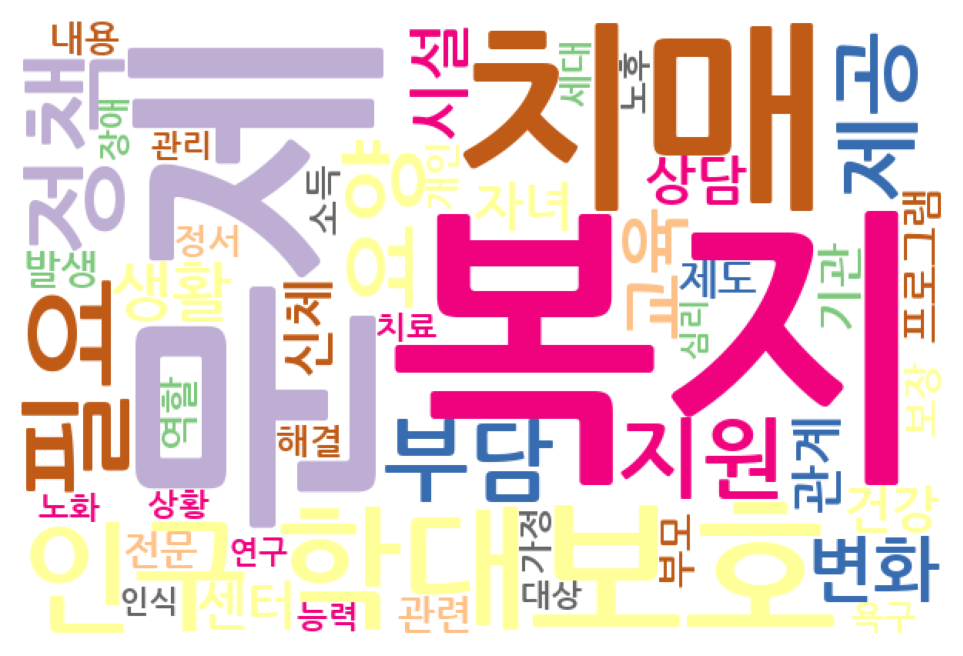

In [25]:
%matplotlib inline
wordcloud = WordCloud(font_path = file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund1)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 2

In [26]:
count = Counter(topic2_nlist) # Counter 객체를 사용하여 topic2_nlist 리스트의 요소들을 카운트
hund2 = dict(count.most_common(50)) # 상위 50개 단어 출력
hund2

{'인구': 2362,
 '소득': 1862,
 '대출': 1764,
 '복지': 1651,
 '연금': 1493,
 '신청': 1480,
 '지원': 1222,
 '가구': 1189,
 '전세': 1097,
 '문제': 944,
 '청년': 925,
 '자금': 825,
 '부담': 813,
 '세대': 793,
 '요양': 787,
 '자녀': 784,
 '수급': 737,
 '생활': 703,
 '부모': 693,
 '제도': 690,
 '노후': 673,
 '필요': 666,
 '급여': 639,
 '국민연금': 585,
 '부동산': 582,
 '대상': 549,
 '준비': 546,
 '생산': 524,
 '정보': 517,
 '재산': 517,
 '일본': 498,
 '보장': 482,
 '버팀목': 477,
 '센터': 473,
 '기관': 469,
 '정책': 463,
 '금융': 461,
 '정도': 456,
 '금리': 452,
 '상황': 445,
 '조건': 443,
 '서울': 443,
 '금액': 421,
 '기간': 417,
 '고령자': 405,
 '일자리': 403,
 '시설': 402,
 '이용': 399,
 '보증금': 399,
 '시작': 388}

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<function matplotlib.pyplot.show(close=None, block=None)>

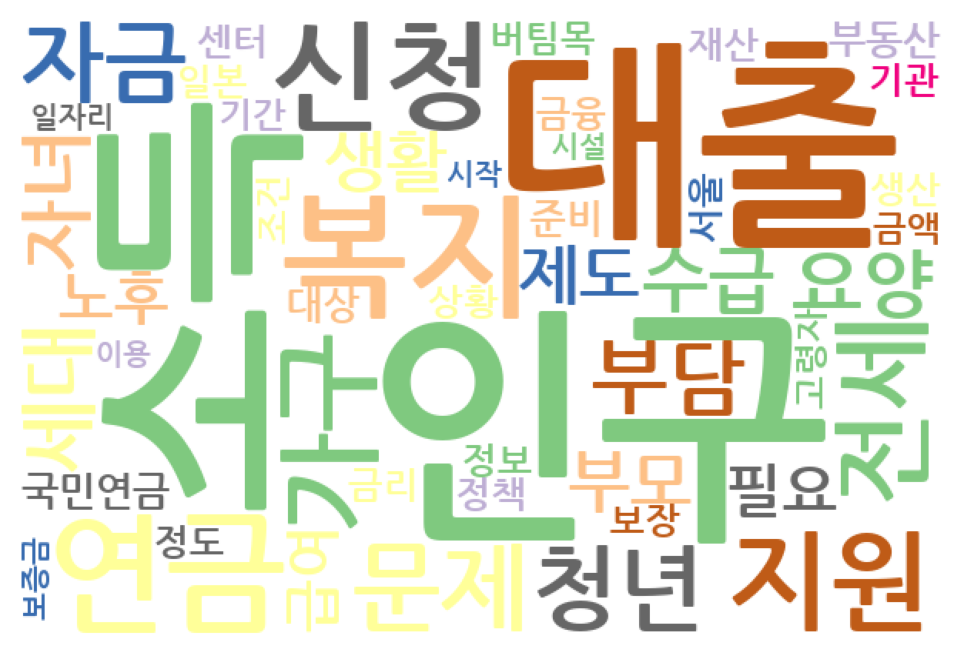

In [28]:
%matplotlib inline
wordcloud = WordCloud(font_path = file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund2)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 3

In [29]:
count = Counter(topic3_nlist) # Counter 객체를 사용하여 topic3_nlist 리스트의 요소들을 카운트
hund3 = dict(count.most_common(50)) # 상위 50개 단어 출력
hund3

{'감사': 1327,
 '알레르기': 312,
 '건강': 251,
 '마음': 242,
 '표현': 221,
 '공통점': 191,
 '정체성': 189,
 '인구': 171,
 '독립': 163,
 '활기': 163,
 '노년기': 162,
 '긍정': 158,
 '물질': 155,
 '운동': 145,
 '개인': 140,
 '인생': 137,
 '필요': 134,
 '세상': 133,
 '다그': 132,
 '나이': 128,
 '생활': 122,
 '조건': 122,
 '인간': 121,
 '준비': 117,
 '사실': 115,
 '부족': 112,
 '지혜': 108,
 '개조': 105,
 '천식': 104,
 '증상': 104,
 '외출': 104,
 '결막염': 104,
 '의미': 99,
 '노년': 98,
 '문제': 89,
 '이해': 87,
 '관리': 86,
 '가치관': 86,
 '조정': 85,
 '일상': 84,
 '친구': 83,
 '처지': 82,
 '배려': 81,
 '종교': 79,
 '유발': 79,
 '꽃가루': 78,
 '먼지': 78,
 '진드기': 78,
 '알레르기 비염': 78,
 '작용': 73}

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<function matplotlib.pyplot.show(close=None, block=None)>

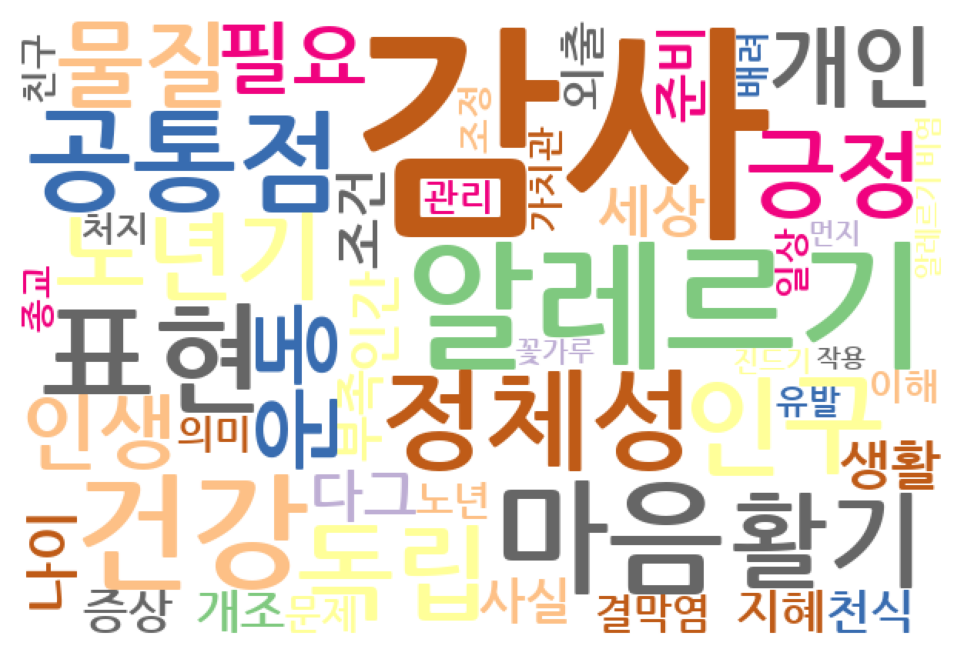

In [31]:
%matplotlib inline
wordcloud = WordCloud(font_path = file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund3)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 댓글 LDA

In [32]:
# 명사만 추출한 리스트를 바탕으로 단어 빈도별 목록을 생성.
from gensim import corpora, models
noun_dic=corpora.Dictionary(data['comment_token_noun'])  # 딕셔너리 클래스로 사전생성, 각 단어별 id도 함께 생성
noun_dic.token2id                                # 각 단어 별 생성된 id 확인     

{'고민': 0,
 '예상': 1,
 '육아': 2,
 '인구': 3,
 '일본': 4,
 '전체': 5,
 '절벽': 6,
 '출산': 7,
 '출생': 8,
 '충격': 9,
 '소식': 10,
 '비밀': 11,
 '대접': 12,
 '레몬': 13,
 '수용소': 14,
 '요나': 15,
 '의식': 16,
 '지정': 17,
 '취급': 18,
 '향기': 19,
 '현실': 20,
 '7월': 21,
 '가람': 22,
 '가시': 23,
 '가정': 24,
 '감사': 25,
 '강릉': 26,
 '건강': 27,
 '관계': 28,
 '그림': 29,
 '긍정': 30,
 '기온': 31,
 '날씨': 32,
 '내용': 33,
 '내일': 34,
 '냉기': 35,
 '노년': 36,
 '다크': 37,
 '달성': 38,
 '답방': 39,
 '대전': 40,
 '더위': 41,
 '두견': 42,
 '마무리': 43,
 '마음': 44,
 '매미': 45,
 '목표': 46,
 '무더위': 47,
 '밤낮': 48,
 '밤잠': 49,
 '방문': 50,
 '방역': 51,
 '변화': 52,
 '병원': 53,
 '보고': 54,
 '보일러': 55,
 '부대': 56,
 '부산': 57,
 '사온': 58,
 '사와': 59,
 '삼일': 60,
 '삼한': 61,
 '상관관계': 62,
 '섭취': 63,
 '세상': 64,
 '소리': 65,
 '소문': 66,
 '수분': 67,
 '숙제': 68,
 '순간': 69,
 '스노우': 70,
 '스테이션': 71,
 '스팅': 72,
 '아침': 73,
 '아파트': 74,
 '어머니': 75,
 '여기저기': 76,
 '여름': 77,
 '여름휴가': 78,
 '여행': 79,
 '여행자': 80,
 '역병': 81,
 '열쇠': 82,
 '오랜만': 83,
 '오후': 84,
 '요사': 85,
 '요소': 86,
 '요양원': 87,
 '요정': 88,
 '유행': 89,
 '

In [33]:
corpus = [noun_dic.doc2bow(text) for text in data['comment_token_noun']]
# 문서별 문서 안의 단어의 id와 빈도수로 수치화

In [34]:
import gensim
from gensim.models import CoherenceModel

Lda = gensim.models.ldamodel.LdaModel 
perplexity_score = [] # perplexity_score를 저장할 리스트
coherence_score = []  # coherence_score를 저장할 리스트

for i in range(1,6): # 토픽 개수가 1,2,3,4,5개인 5가지 경우의 혼잡도와 일관성 측정
    ldamodel = Lda(corpus, num_topics = i, id2word = noun_dic, passes = 15, random_state = 0) # passes : 모델 학습 시 알고리즘의 동작 횟수
    perplexity_score.append(ldamodel.log_perplexity(corpus)) #혼잡도 : 실제로 관측되는 값을 얼마나 잘 예측하는지
    coherence_score.append(CoherenceModel(model = ldamodel, texts = data['comment_token_noun'],
                                         dictionary = noun_dic, coherence = 'c_v').get_coherence()) # 일관성 : 한 주제 안에 유사한 단어가 많이 모여있는가
    print(i,'process complete')

1 process complete
2 process complete
3 process complete
4 process complete
5 process complete


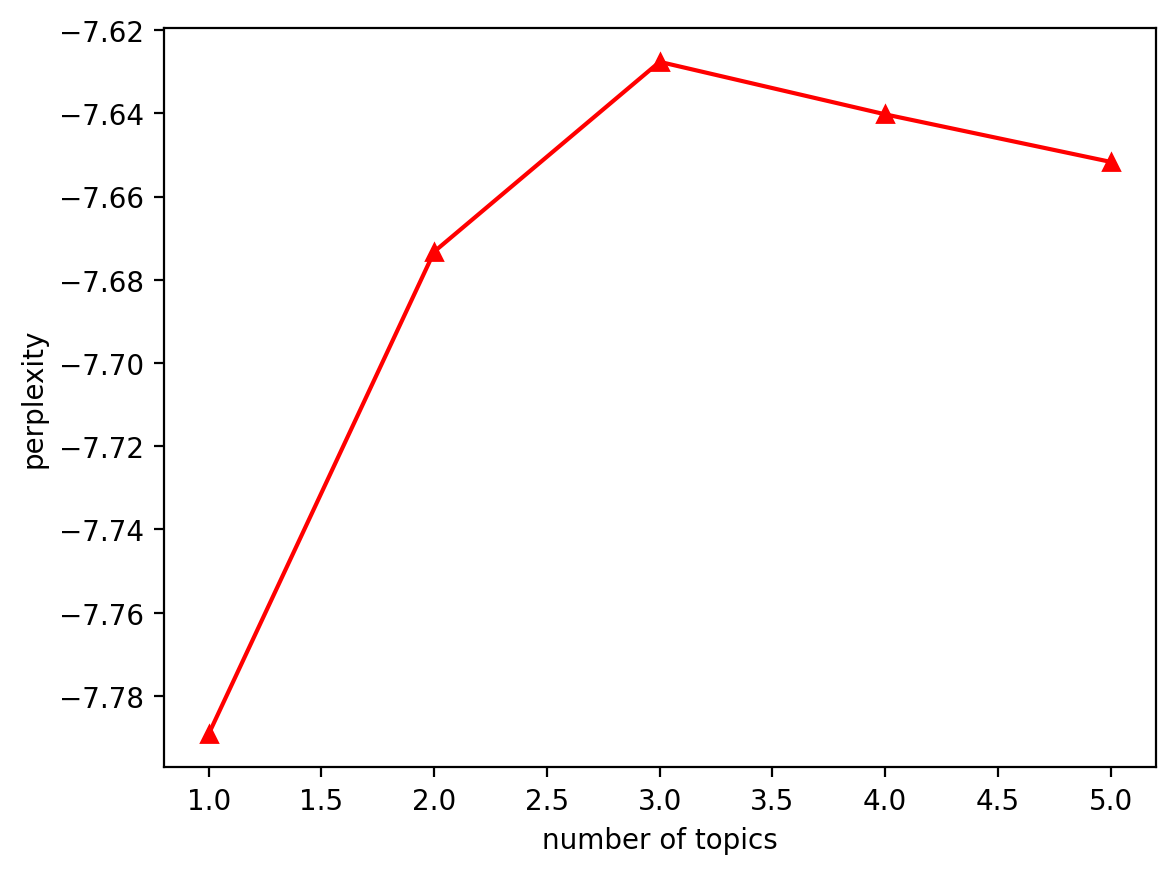

In [35]:
plt.plot(range(1,6), perplexity_score, 'r', marker ='^') #(x,y,color)
plt.xlabel("number of topics")
plt.ylabel("perplexity") # 혼잡도
plt.show()

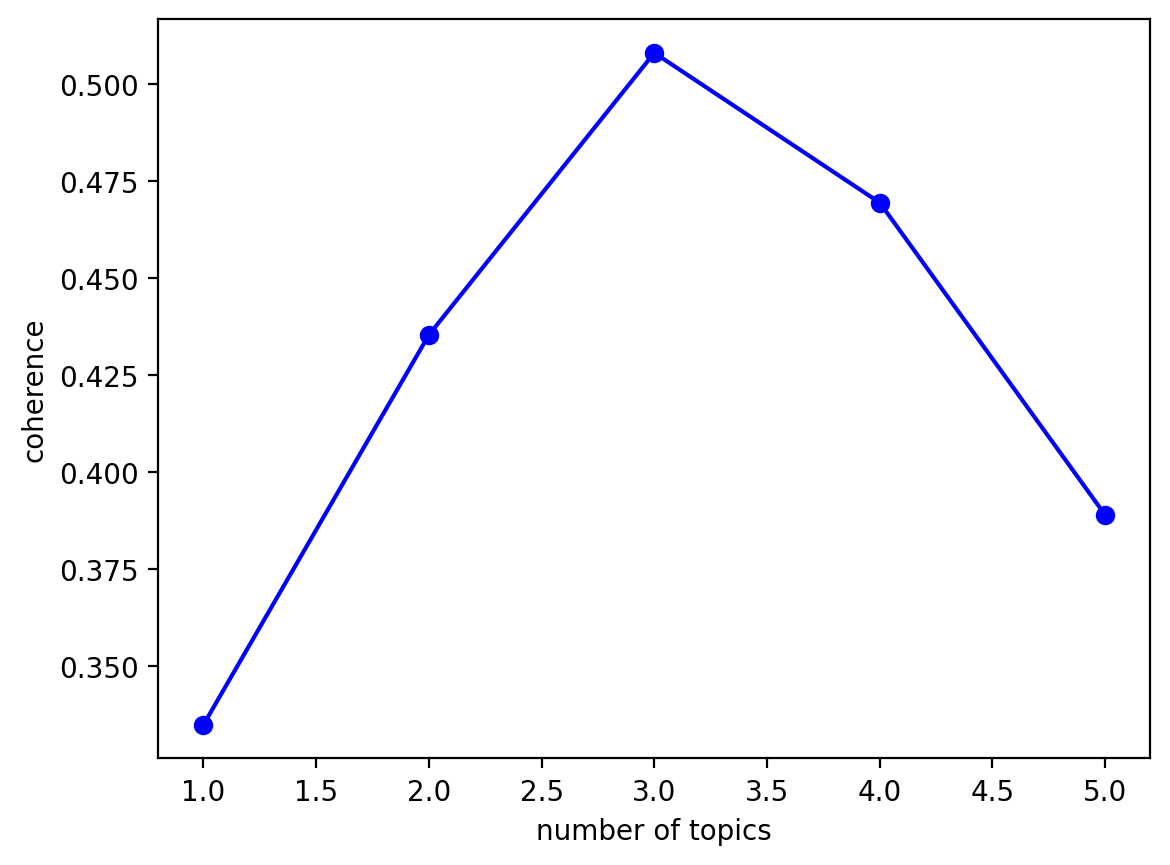

In [36]:
plt.plot(range(1,6), coherence_score, 'b', marker ='o') #(x,y,color)
plt.xlabel("number of topics")
plt.ylabel("coherence") # 일관성
plt.show()

In [37]:
# 최적의 토픽수(3)로 토픽 모델링 진행
noun_lda = Lda(corpus, num_topics = 3, id2word = noun_dic, passes = 15, random_state = 0)
topics = noun_lda.print_topics(num_words = 5) # 토픽별 5개의 단어씩 출력
for topic in topics: # 3개의 토픽이므로 3로 압축된 토픽을 각각 출력
    print(topic)

(0, '0.013*"감사" + 0.012*"급여" + 0.012*"소득" + 0.010*"신청" + 0.009*"연금"')
(1, '0.015*"인구" + 0.014*"세대" + 0.012*"싱글" + 0.011*"문제" + 0.010*"혐오"')
(2, '0.089*"감사" + 0.035*"정보" + 0.021*"하루" + 0.021*"비밀" + 0.018*"행복"')


In [38]:
# Lda 시각화
import pyLDAvis
import pyLDAvis.gensim_models # prepare 함수를 쓰기 위한 라이브러리
pyLDAvis.enable_notebook()
lda_viz = pyLDAvis.gensim_models.prepare(noun_lda, corpus, noun_dic)

pyLDAvis.display(lda_viz)

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [40]:
noun_dtm = [noun_dic.doc2bow(text) for text in data['comment_token_noun']] # 문서별 문서 안의 단어의 id와 빈도수로 수치화
ldamodel=Lda(noun_dtm, num_topics=3, id2word=noun_dic, passes=10,random_state=0)

topics = []
for i in range(len(noun_dtm)):
    prop_sort=[]
    topic_sort=[]
    for topic , prop in ldamodel.get_document_topics(noun_dtm)[i]:  #각 문서마다 토픽 별로 해당할 확률이 부여됨
        prop_sort.append(prop)
        topic_sort.append(topic)
    topics.append(topic_sort[prop_sort.index(max(prop_sort))])  #확률 중 가장 높은 확률의 토픽을 해당 문서의 토픽으로 지정

data['comment_topic'] = topics #모든 문서의 토픽을 데이터프레임에 추가

In [41]:
for comment_topic, prop in ldamodel.get_document_topics(noun_dtm)[1]:
    print(comment_topic, prop)

0 0.030704781
1 0.943021
2 0.026274249


In [42]:
f = open(file_path + "topic_doc.pkl", "wb")
pickle.dump(data, f)  # 파일로 저장
f.close()

In [43]:
f = open(file_path + "topic_doc.pkl", "rb")
aa = pickle.load(f) # 불러오기
f.close()

In [44]:
topic0 = aa[aa['comment_topic'] == 0]  # 'comment_topic' 컬럼 값이 0인 행들만 선택하여 topic0에 저장
topic1 = aa[aa['comment_topic'] == 1]  # 'comment_topic' 컬럼 값이 1인 행들만 선택하여 topic1에 저장
topic2 = aa[aa['comment_topic'] == 2]  # 'comment_topic' 컬럼 값이 2인 행들만 선택하여 topic2에 저장

### 토픽별 워드 클라우드

In [45]:
topic0_tn = topic0['comment_token_noun'] # topic0에 해당하는 댓글들의 토큰화된 명사들을 topic0_tn에 저장
topic1_tn = topic1['comment_token_noun'] # topic1에 해당하는 댓글들의 토큰화된 명사들을 topic1_tn에 저장
topic2_tn = topic2['comment_token_noun'] # topic2에 해당하는 댓글들의 토큰화된 명사들을 topic2_tn에 저장

In [46]:
import itertools
topic0_nlist = list(itertools.chain(*topic0_tn)) # 리스트 언패킹
topic1_nlist = list(itertools.chain(*topic1_tn)) # 리스트 언패킹
topic2_nlist = list(itertools.chain(*topic2_tn)) # 리스트 언패킹

In [47]:
from collections import Counter # 단어들을 쉽게 집계하기 위해 사용

### 토픽 0

In [48]:
count = Counter(topic0_nlist)
hund0 = dict(count.most_common(50)) # 상위 50개 단어 출력
hund0

{'감사': 752,
 '급여': 578,
 '소득': 558,
 '신청': 439,
 '재산': 422,
 '수급': 399,
 '연금': 388,
 '대출': 370,
 '생계': 353,
 '전세': 326,
 '의료': 315,
 '부모': 303,
 '센터': 271,
 '정보': 269,
 '요양': 264,
 '엄마': 259,
 '가구': 218,
 '지원': 213,
 '필요': 198,
 '주거': 197,
 '어머니': 195,
 '시설': 182,
 '복지': 180,
 '정도': 177,
 '자금': 177,
 '요양원': 174,
 '병원': 170,
 '금액': 168,
 '주민': 165,
 '말씀': 164,
 '버팀목': 162,
 '문제': 154,
 '치매': 148,
 '장애인': 143,
 '문의': 139,
 '답변': 136,
 '내용': 135,
 '청년': 134,
 '임대': 134,
 '가입': 133,
 '도움': 132,
 '이용': 131,
 '자녀': 127,
 '해당': 126,
 '마음': 124,
 '상황': 123,
 '상담': 121,
 '의무': 120,
 '생활': 119,
 '국민연금': 117}

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<function matplotlib.pyplot.show(close=None, block=None)>

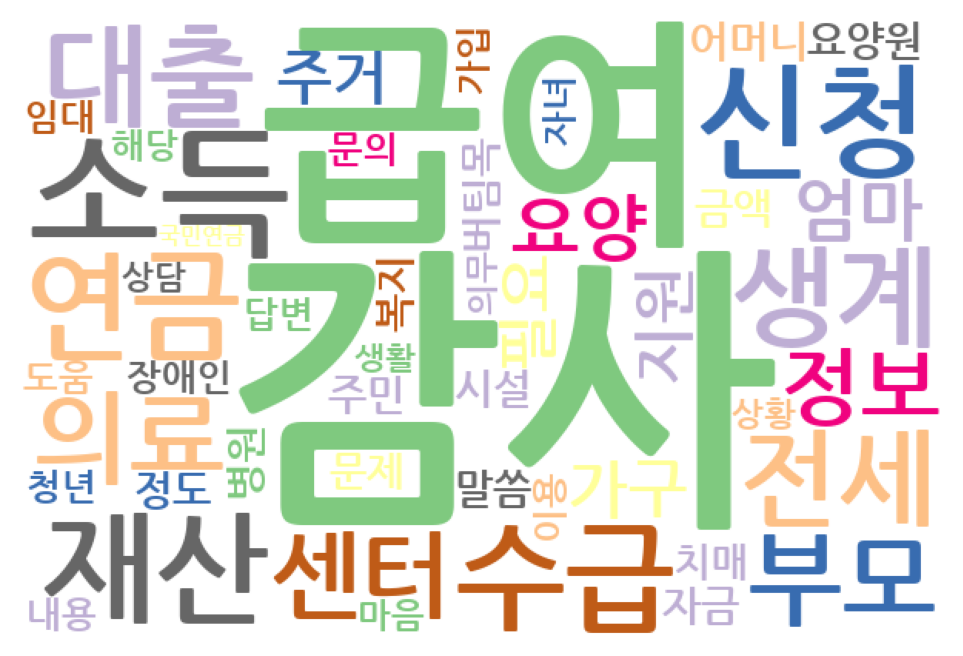

In [50]:
%matplotlib inline
wordcloud = WordCloud(font_path = file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund0)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 1

In [51]:
count = Counter(topic1_nlist)
hund1 = dict(count.most_common(50)) # 상위 50개 단어 출력
hund1

{'인구': 240,
 '문제': 199,
 '나라': 150,
 '출산': 144,
 '세대': 125,
 '세금': 96,
 '걱정': 83,
 '결혼': 77,
 '부동산': 77,
 '집값': 77,
 '정책': 75,
 '복지': 72,
 '미국': 71,
 '여성': 69,
 '미래': 66,
 '정도': 66,
 '시대': 61,
 '일본': 60,
 '해결': 55,
 '저출산': 55,
 '부모': 51,
 '상황': 48,
 '공감': 48,
 '필요': 47,
 '여자': 47,
 '이유': 46,
 '요즘': 46,
 '싱글': 44,
 '자식': 42,
 '나이': 41,
 '중국': 40,
 '혜택': 40,
 '선진국': 40,
 '개인': 39,
 '노후': 39,
 '얘기': 38,
 '아이들': 38,
 '현실': 37,
 '말씀': 37,
 '이민': 37,
 '사실': 36,
 '시작': 36,
 '부분': 36,
 '감사': 35,
 '자녀': 35,
 '기업': 35,
 '분양': 35,
 '세상': 34,
 '연금': 34,
 '인간': 33}

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<function matplotlib.pyplot.show(close=None, block=None)>

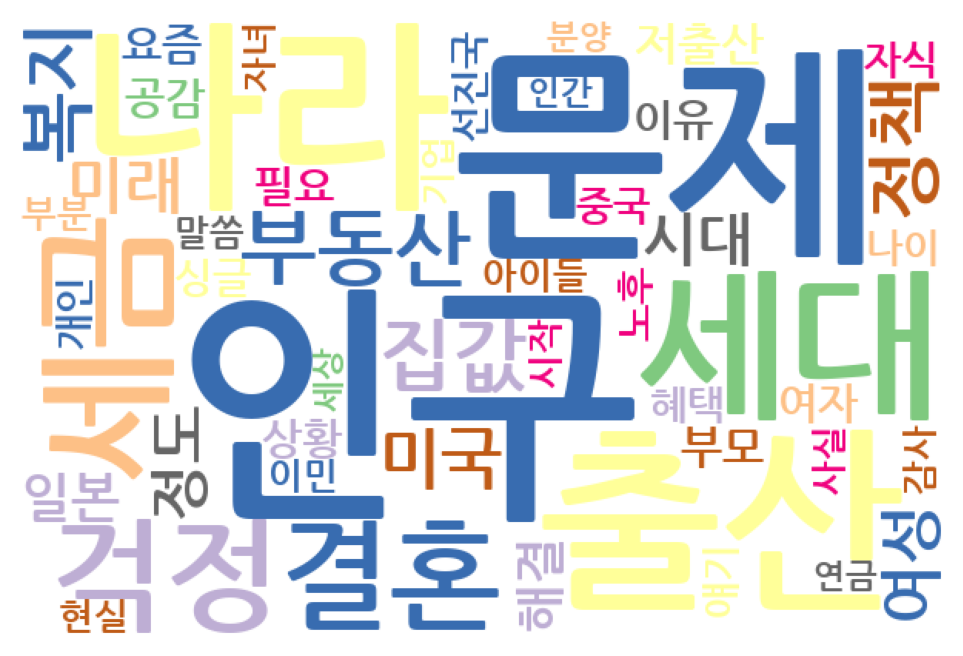

In [53]:
%matplotlib inline
wordcloud = WordCloud(font_path = file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund1)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 2

In [54]:
count = Counter(topic2_nlist)
hund2 = dict(count.most_common(50)) # 상위 50개 단어 출력
hund2

{'감사': 1184,
 '정보': 544,
 '비밀': 303,
 '스팅': 207,
 '하루': 205,
 '행복': 166,
 '화이팅': 111,
 '방문': 94,
 '도움': 80,
 '건강': 72,
 '주말': 63,
 '공감': 61,
 '성적': 60,
 '이웃': 59,
 '좋은 하루': 56,
 '노후': 53,
 '준비': 48,
 '말씀': 47,
 '정리': 42,
 '시작': 41,
 '내용': 39,
 '소통': 38,
 '필요': 38,
 '즐거운 하루': 37,
 '응원': 37,
 '정성': 36,
 '저녁': 34,
 '날씨': 33,
 '보고': 31,
 '부탁': 31,
 '면적': 31,
 '복지': 30,
 '마음': 29,
 '관련': 29,
 '조심': 28,
 '이해': 28,
 '참고': 28,
 '덕분': 27,
 '관심': 25,
 '기분': 24,
 '교육': 24,
 '코로나': 23,
 '편안': 23,
 '요즘': 23,
 '부분': 23,
 '마무리': 22,
 '고생': 22,
 '걱정': 22,
 '사회복지사': 22,
 '학대': 22}

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<function matplotlib.pyplot.show(close=None, block=None)>

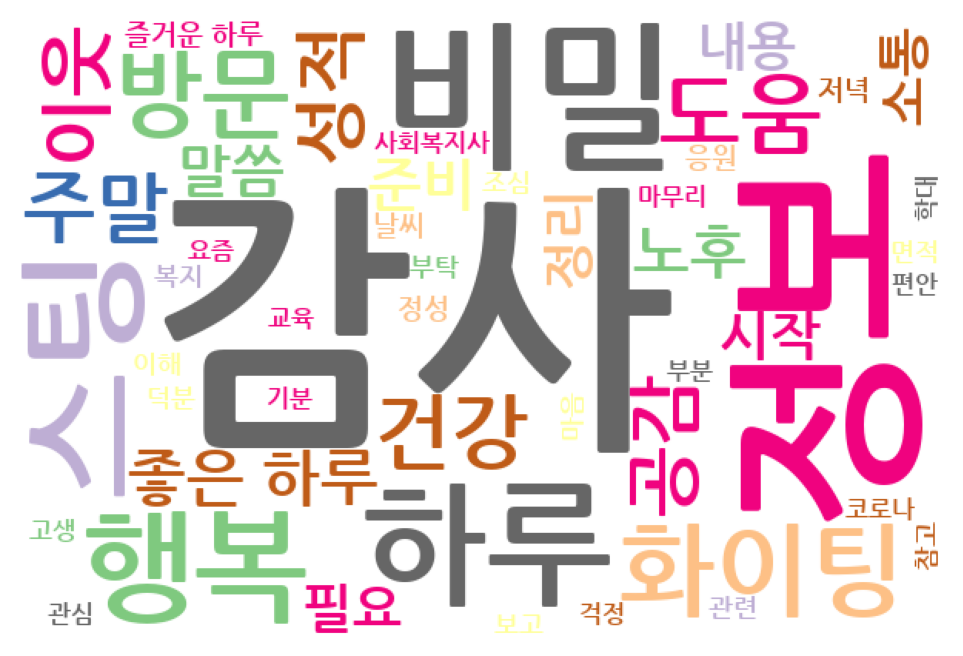

In [56]:
%matplotlib inline
wordcloud = WordCloud(font_path = file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund2)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show